# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
main_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [6]:
main_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
y = main_df['Outcome']

In [9]:
X = main_df.drop(columns='Outcome')

In [10]:
X.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [58]:
rtc_model = RandomForestClassifier( max_depth= 10, min_samples_leaf= 2, min_samples_split= 2,n_estimators= 100)

In [59]:
rtc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [60]:
y_train_preds = rtc_model.predict(X_train)
y_test_preds = rtc_model.predict(X_test)

In [61]:
accuracy_score(y_true = y_train, y_pred = y_train_preds)

0.9625407166123778

In [62]:
accuracy_score(y_true = y_test, y_pred = y_test_preds)

0.7857142857142857

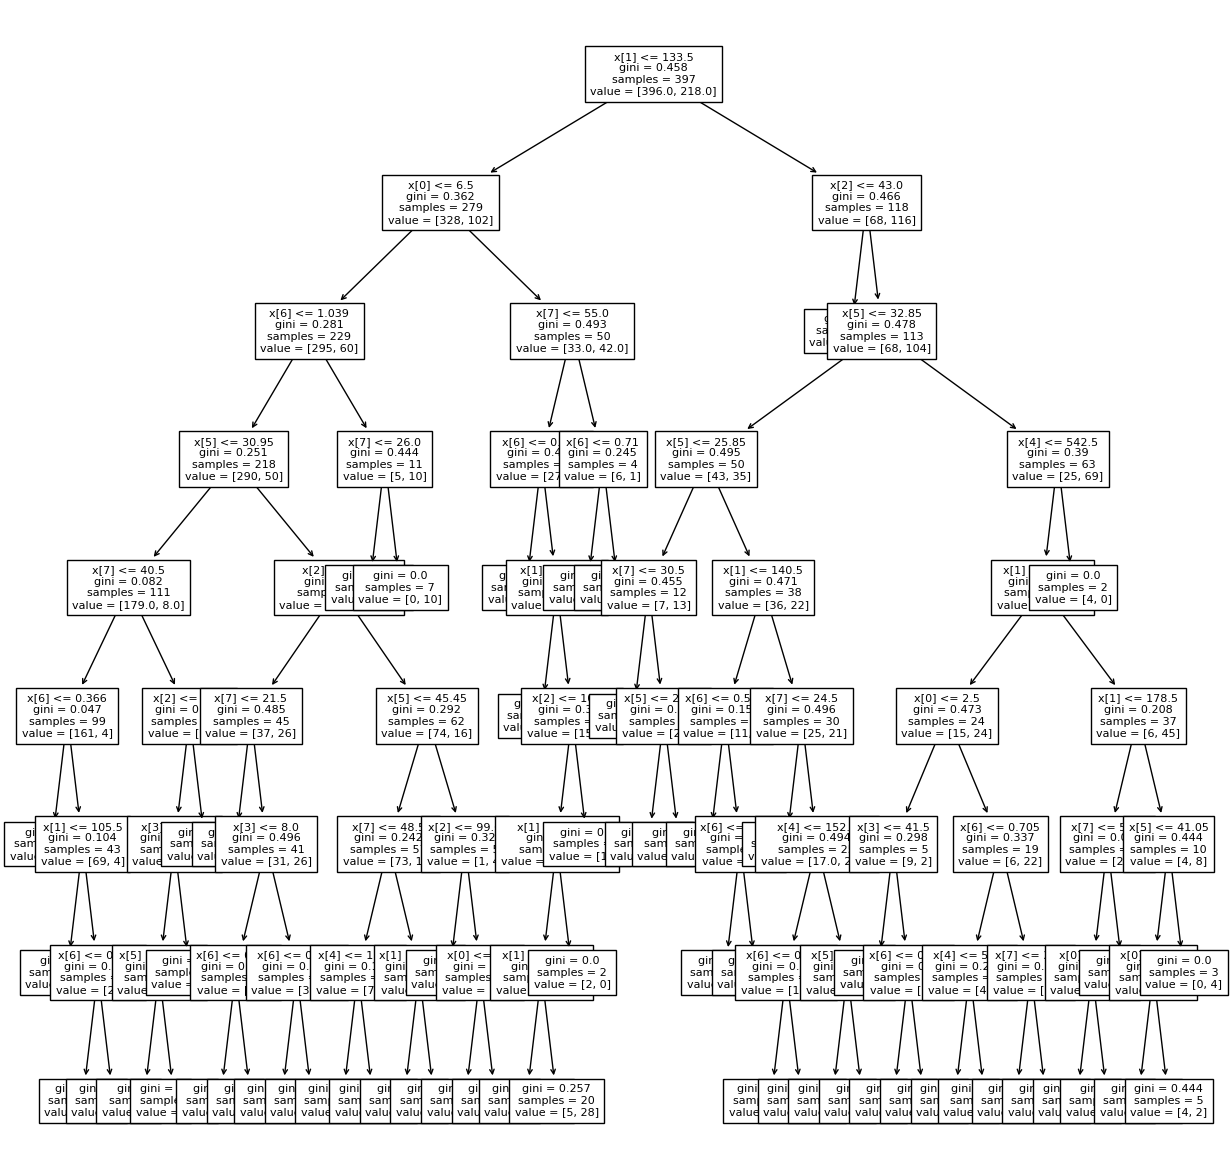

In [41]:
plt.figure(figsize=(15,15))
tree.plot_tree(rtc_model.estimators_[0], fontsize=8)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

In [63]:
hyperparameters = {'n_estimators':[5,10,20,30],
                   'max_depth' : [8,10,12,15],
                   'min_samples_split':[4,6,8,10],
                   'min_samples_leaf': [4,8,12,15]  }

In [43]:
#base_rf_model = RandomForestClassifier()

In [64]:
grid_model = GridSearchCV(RandomForestClassifier(), param_grid= hyperparameters, scoring='accuracy', cv=5)

In [65]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12, 15],
                         'min_samples_leaf': [4, 8, 12, 15],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [5, 10, 20, 30]},
             scoring='accuracy')

In [66]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=30)

In [68]:
new_rfc_model = RandomForestClassifier()
new_rfc_model.set_params(**grid_model.best_params_)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=30)

In [72]:
new_rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=30)

In [73]:
y_train_preds = rtc_model.predict(X_train)
y_test_preds = rtc_model.predict(X_test)

In [75]:
accuracy_score(y_true=y_train, y_pred=y_train_preds)

0.9625407166123778

In [76]:
accuracy_score(y_true=y_test, y_pred=y_test_preds)

0.7857142857142857